In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.model_selection import learning_curve, GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
from IPython.display import display, HTML
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import graphviz

In [2]:
input_file="https://raw.githubusercontent.com/AADRIANV/CST-383-F24-Project-2/refs/heads/main/NIJ_s_Recidivism_Challenge_Training_Dataset_20241205.csv"
df=pd.read_csv(input_file)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 53 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Gender                                             18028 non-null  object 
 2   Race                                               18028 non-null  object 
 3   Age_at_Release                                     18028 non-null  object 
 4   Residence_PUMA                                     18028 non-null  int64  
 5   Gang_Affiliated                                    15811 non-null  object 
 6   Supervision_Risk_Score_First                       17698 non-null  float64
 7   Supervision_Level_First                            16816 non-null  object 
 8   Education_Level                                    18028 non-null  object 
 9   Depend

In [4]:
df=df.drop(["Residence_PUMA","Condition_MH_SA", "Condition_Cog_Ed", "Condition_Other", "DrugTests_THC_Positive", "DrugTests_Cocaine_Positive", "DrugTests_Meth_Positive", "DrugTests_Other_Positive", "Percent_Days_Employed"], axis =1 )

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 44 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Gender                                             18028 non-null  object 
 2   Race                                               18028 non-null  object 
 3   Age_at_Release                                     18028 non-null  object 
 4   Gang_Affiliated                                    15811 non-null  object 
 5   Supervision_Risk_Score_First                       17698 non-null  float64
 6   Supervision_Level_First                            16816 non-null  object 
 7   Education_Level                                    18028 non-null  object 
 8   Dependents                                         18028 non-null  object 
 9   Prison

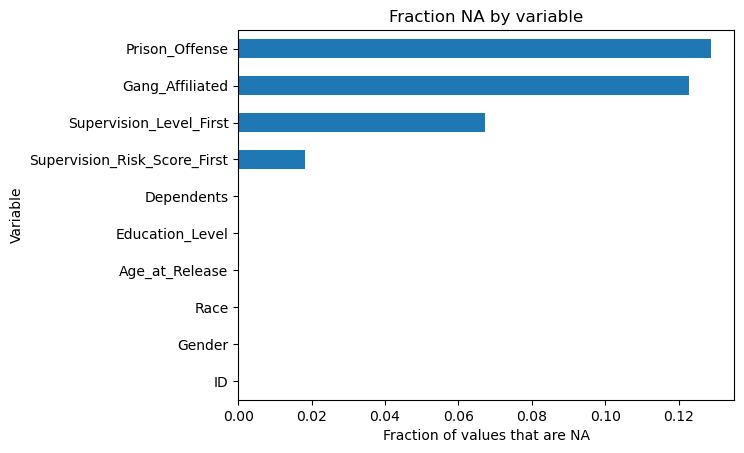

In [6]:
df.isna().mean().head(10).sort_values().plot.barh()
plt.title('Fraction NA by variable')
plt.xlabel('Fraction of values that are NA')
plt.ylabel('Variable');

In [7]:
df.apply([pd.Series.nunique, pd.Series.unique]).transpose()

,nunique,unique
ID,18028,"[1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 14, 17, 18, ..."
Gender,2,"[M, F]"
Race,2,"[BLACK, WHITE]"
Age_at_Release,7,"[43-47, 33-37, 48 or older, 38-42, 18-22, 23-2..."
Gang_Affiliated,2,"[False, nan, True]"
Supervision_Risk_Score_First,10,"[3.0, 6.0, 7.0, 4.0, 2.0, 5.0, 1.0, 10.0, 9.0,..."
Supervision_Level_First,3,"[Standard, Specialized, High, nan]"
Education_Level,3,"[At least some college, Less than HS diploma, ..."
Dependents,4,"[3 or more, 1, 2, 0]"
Prison_Offense,5,"[Drug, Violent/Non-Sex, Property, nan, Other, ..."


In [8]:
print(df['Prison_Offense'])

0                   Drug
1        Violent/Non-Sex
2                   Drug
3               Property
4        Violent/Non-Sex
              ...       
18023                NaN
18024                NaN
18025                NaN
18026                NaN
18027                NaN
Name: Prison_Offense, Length: 18028, dtype: object


We will now fill the prison offense column na values with a new classification that will be unknown.  We will do the same with the gang affiliatted column since the options are clear cut with True/False.  For the Supervision_Level_First column we will replace na values with 'Standard'.  And Finally for the Supervision_Risck_Score_First we will replace na values with the median score.  

In [9]:
df['Prison_Offense'] = df['Prison_Offense'].fillna('Unknown')
df['Gang_Affiliated'] = df['Gang_Affiliated'].fillna('Unknown')
df['Supervision_Level_First'] = df['Supervision_Level_First'].fillna('Standard')
df['Supervision_Risk_Score_First'] = df['Supervision_Risk_Score_First'].fillna(df['Supervision_Risk_Score_First'].median())
df['Avg_Days_per_DrugTest'] = df['Avg_Days_per_DrugTest'].fillna(df['Avg_Days_per_DrugTest'].median())
df['Jobs_Per_Year'] = df['Jobs_Per_Year'].fillna(df['Jobs_Per_Year'].median())

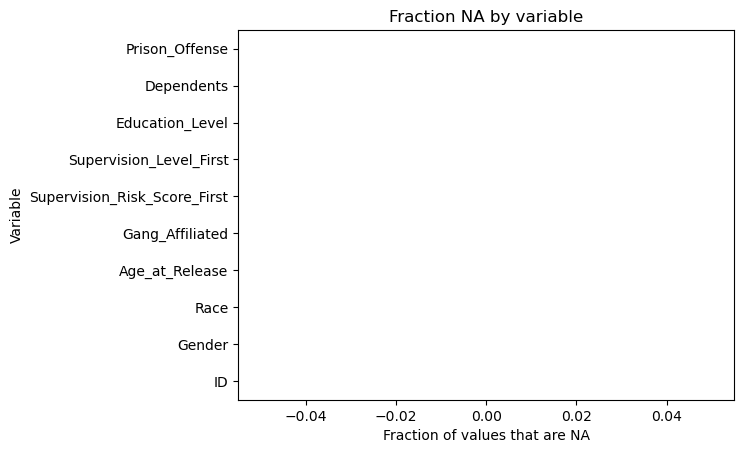

In [10]:
df.isna().mean().head(10).sort_values().plot.barh()
plt.title('Fraction NA by variable')
plt.xlabel('Fraction of values that are NA')
plt.ylabel('Variable');

Now we can see that all of our na values are taken care of.  Now we have to do encoding for the catagorical varibles since logistic regression has to use numerical data.

In [11]:
categorical_columns = ['Gender', 'Race', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 'Gang_Affiliated', 'Age_at_Release', 'Prison_Years']

dummy_column_groups = {}

for col in categorical_columns:
    dummies = pd.get_dummies(df[col], prefix=col)
    dummy_column_groups[col] = list(dummies.columns)
    df = pd.concat([df, dummies], axis=1)

df = df.drop(columns=categorical_columns)


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18028 entries, 0 to 18027
Data columns (total 66 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   ID                                                 18028 non-null  int64  
 1   Supervision_Risk_Score_First                       18028 non-null  float64
 2   Dependents                                         18028 non-null  object 
 3   Prior_Arrest_Episodes_Felony                       18028 non-null  object 
 4   Prior_Arrest_Episodes_Misd                         18028 non-null  object 
 5   Prior_Arrest_Episodes_Violent                      18028 non-null  object 
 6   Prior_Arrest_Episodes_Property                     18028 non-null  object 
 7   Prior_Arrest_Episodes_Drug                         18028 non-null  object 
 8   Prior_Arrest_Episodes_PPViolationCharges           18028 non-null  object 
 9   Prior_

We now have to scale some of the numerical data.

In [13]:
numeric_data = ['Supervision_Risk_Score_First', 'Avg_Days_per_DrugTest', 'Jobs_Per_Year']
scale = StandardScaler()
df[numeric_data] = scale.fit_transform(df[numeric_data])

Lastly we have to encode all columns with catagories like "4 or more".  We will set a cap on these columns and convert "4 or more" entries to the number 4.

In [14]:
cols = ['Prior_Conviction_Episodes_Drug']
mapping = {'2 or more': 2}
df[cols] = df[cols].replace(mapping)
cols = ['Dependents', 'Prior_Arrest_Episodes_Violent', 'Prior_Conviction_Episodes_Felony', 'Prior_Conviction_Episodes_Prop', 'Program_UnexcusedAbsences','Residence_Changes']
mapping = {'3 or more': 3}
df[cols] = df[cols].replace(mapping)
cols = ['Prior_Conviction_Episodes_Misd', 'Delinquency_Reports']
mapping = {'4 or more': 4}
df[cols] = df[cols].replace(mapping)
cols = ['Prior_Arrest_Episodes_Property', 'Prior_Arrest_Episodes_Drug', 'Prior_Arrest_Episodes_PPViolationCharges']
mapping = {'5 or more': 5}
df[cols] = df[cols].replace(mapping)
cols = ['Prior_Arrest_Episodes_Misd']
mapping = {'6 or more': 6}
df[cols] = df[cols].replace(mapping)
cols = ['Prior_Arrest_Episodes_Felony', 'Program_Attendances']
mapping = {'10 or more': 10}
df[cols] = df[cols].replace(mapping)

Now we can preform a test train split and start to make predictions.

In [15]:
df.isna().sum()

ID                                        0
Supervision_Risk_Score_First              0
Dependents                                0
Prior_Arrest_Episodes_Felony              0
Prior_Arrest_Episodes_Misd                0
                                         ..
Age_at_Release_48 or older                0
Prison_Years_1-2 years                    0
Prison_Years_Greater than 2 to 3 years    0
Prison_Years_Less than 1 year             0
Prison_Years_More than 3 years            0
Length: 66, dtype: int64

In [16]:
df.apply([pd.Series.nunique, pd.Series.unique]).transpose()

,nunique,unique
ID,18028,"[1, 2, 3, 4, 5, 7, 9, 10, 11, 13, 14, 17, 18, ..."
Supervision_Risk_Score_First,10,"[-1.297654171637761, -0.02692579541366771, 0.3..."
Dependents,4,"[3, 1, 2, 0]"
Prior_Arrest_Episodes_Felony,11,"[6, 7, 8, 4, 10, 3, 9, 5, 2, 1, 0]"
Prior_Arrest_Episodes_Misd,7,"[6, 4, 3, 5, 2, 0, 1]"
...,...,...
Age_at_Release_48 or older,2,"[False, True]"
Prison_Years_1-2 years,2,"[False, True]"
Prison_Years_Greater than 2 to 3 years,2,"[False, True]"
Prison_Years_Less than 1 year,2,"[False, True]"


In [17]:
X = df.drop(columns=['ID', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'])
y = df['Recidivism_Within_3years']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y.value_counts())

Recidivism_Within_3years
True     10421
False     7607
Name: count, dtype: int64


In [18]:
regr = LogisticRegression(max_iter=1000, C=0.1)
regr.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000)

<Axes: xlabel='Feature'>

<Figure size 1200x1600 with 0 Axes>

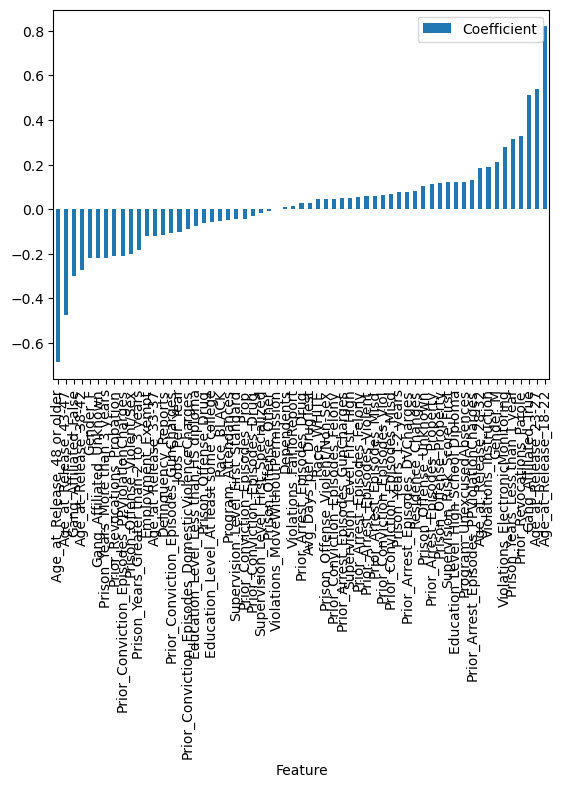

In [19]:
coefficients = regr.coef_[0]
feature_coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': coefficients
})
plt.figure(figsize=(12, 16))
feature_coefficients.sort_values(by='Coefficient', ascending=True).plot.bar(x='Feature', y='Coefficient')

              precision    recall  f1-score   support

       False       0.67      0.52      0.59      2322
        True       0.69      0.81      0.75      3087

    accuracy                           0.69      5409
   macro avg       0.68      0.67      0.67      5409
weighted avg       0.68      0.69      0.68      5409

ROC-AUC Score: 0.7425620262460425


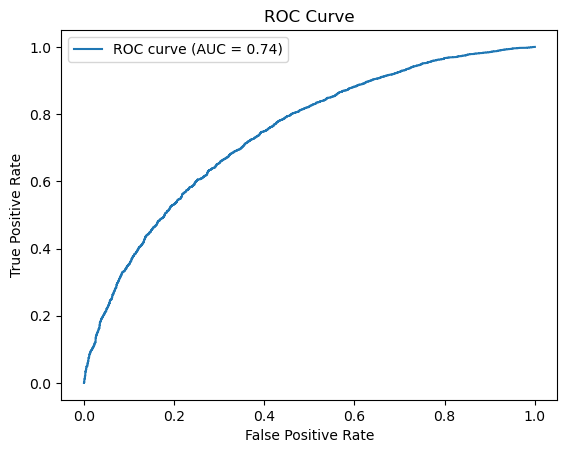

In [20]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [21]:
# training_default_removal = ['ID', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']
# X = df.drop(columns=training_default_removal)
# y = df['Recidivism_Within_3years']

# # Drop groups and find the best combination of predictors
# drop_dummy_groups = ['Gender', 'Race', 'Supervision_Level_First', 'Education_Level', 'Prison_Offense', 'Gang_Affiliated', 'Age_at_Release', 'Prison_Years']

# best_score = 0
# best_combination = None

# # Iterate through combinations of groups to drop
# for i in range(1, len(drop_dummy_groups) + 1):
#     for combo in combinations(drop_dummy_groups, i):
#         # Create a list of columns to drop
#         dropping = []
#         for group in combo:
#             if group in dummy_column_groups:
#                 dropping.extend(dummy_column_groups[group])
        
#         # Drop the selected columns
#         X_temp = X.drop(columns=dropping, errors='ignore')
        
#         # Split data into train and test
#         X_train, X_test, y_train, y_test = train_test_split(X_temp, y, test_size=0.3, random_state=42)
        
#         # Fit logistic regression model
#         model = LogisticRegression(max_iter=1000, C=0.1)
#         model.fit(X_train, y_train)
        
#         # Evaluate using cross-validation
#         score = cross_val_score(model, X_temp, y, cv=5, scoring='accuracy').mean()

        
#         # Update the best combination
#         if score > best_score:
#             best_score = score
#             best_combination = combo

# # Print the best results
# print(f"Best Accuracy: {best_score}")
# print(f"Best Combination of Groups to Drop: {best_combination}")

In [22]:
X = df.drop(columns=['ID', 'Recidivism_Within_3years'])
y = df['Recidivism_Within_3years']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print(y.value_counts())

Recidivism_Within_3years
True     10421
False     7607
Name: count, dtype: int64


In [23]:
regr = LogisticRegression(max_iter=1000, C=10)
regr.fit(X_train, y_train)

LogisticRegression(C=10, max_iter=1000)

              precision    recall  f1-score   support

       False       1.00      1.00      1.00      2322
        True       1.00      1.00      1.00      3087

    accuracy                           1.00      5409
   macro avg       1.00      1.00      1.00      5409
weighted avg       1.00      1.00      1.00      5409

ROC-AUC Score: 1.0


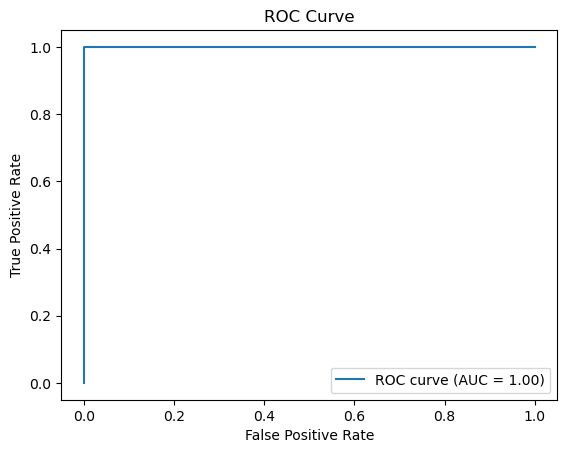

In [24]:
y_pred = regr.predict(X_test)
y_proba = regr.predict_proba(X_test)[:, 1]

print(classification_report(y_test, y_pred))

roc_auc = roc_auc_score(y_test, y_proba)
print("ROC-AUC Score:", roc_auc)

fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

In [25]:
# X = df.drop(columns=['ID', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'])
# y = df['Recidivism_Arrest_Year2']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# print(y.value_counts())

In [26]:
# regr = LogisticRegression(max_iter=1000, C=10)
# regr.fit(X_train, y_train)

In [27]:
# y_pred = regr.predict(X_test)
# y_proba = regr.predict_proba(X_test)[:, 1]

# print(classification_report(y_test, y_pred))

# roc_auc = roc_auc_score(y_test, y_proba)
# print("ROC-AUC Score:", roc_auc)

# fpr, tpr, _ = roc_curve(y_test, y_proba)
# plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

In [28]:
# X = df.drop(columns=['ID', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3'])
# y = df['Recidivism_Arrest_Year3']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# print(y.value_counts())

In [29]:
# regr = LogisticRegression(max_iter=1000, C=10)
# regr.fit(X_train, y_train)

In [30]:
# y_pred = regr.predict(X_test)
# y_proba = regr.predict_proba(X_test)[:, 1]

# print(classification_report(y_test, y_pred))

# roc_auc = roc_auc_score(y_test, y_proba)
# print("ROC-AUC Score:", roc_auc)

# fpr, tpr, _ = roc_curve(y_test, y_proba)
# plt.plot(fpr, tpr, label=f"ROC curve (AUC = {roc_auc:.2f})")
# plt.xlabel("False Positive Rate")
# plt.ylabel("True Positive Rate")
# plt.title("ROC Curve")
# plt.legend()
# plt.show()

In [31]:

param_grid = {'C': [0.01, 0.1, 1, 10, 100]}
grid_search = GridSearchCV(LogisticRegression(max_iter=1000, random_state=42), param_grid, cv=5, scoring='roc_auc')
grid_search.fit(X_train, y_train)

print("Best Hyperparameters:", grid_search.best_params_)

Best Hyperparameters: {'C': 0.1}


Class distribution before oversampling:
Recidivism_Within_3years
True     7334
False    5285
Name: count, dtype: int64

Class distribution after oversampling:
Recidivism_Within_3years
True     7334
False    7334
Name: count, dtype: int64


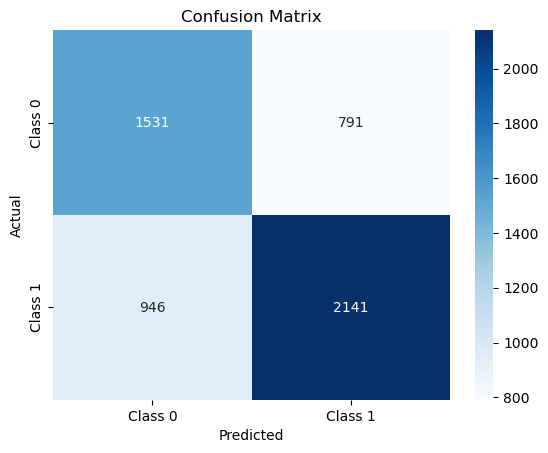

              precision    recall  f1-score   support

       False       0.62      0.66      0.64      2322
        True       0.73      0.69      0.71      3087

    accuracy                           0.68      5409
   macro avg       0.67      0.68      0.67      5409
weighted avg       0.68      0.68      0.68      5409



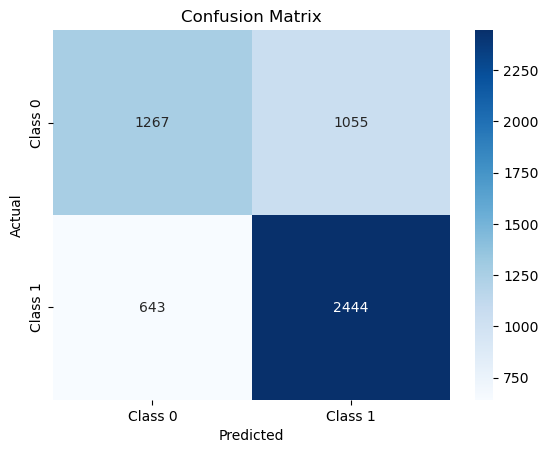

              precision    recall  f1-score   support

       False       0.66      0.55      0.60      2322
        True       0.70      0.79      0.74      3087

    accuracy                           0.69      5409
   macro avg       0.68      0.67      0.67      5409
weighted avg       0.68      0.69      0.68      5409



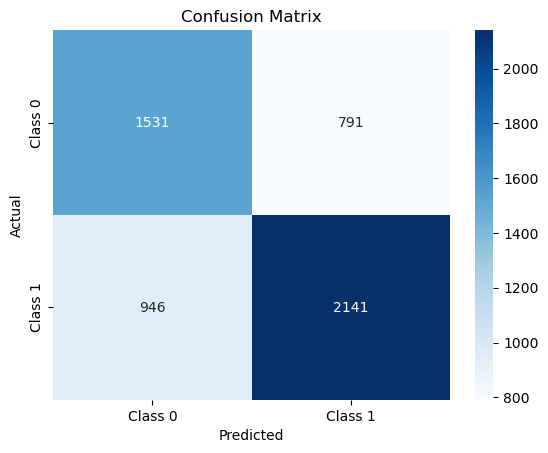

              precision    recall  f1-score   support

       False       0.62      0.66      0.64      2322
        True       0.73      0.69      0.71      3087

    accuracy                           0.68      5409
   macro avg       0.67      0.68      0.67      5409
weighted avg       0.68      0.68      0.68      5409



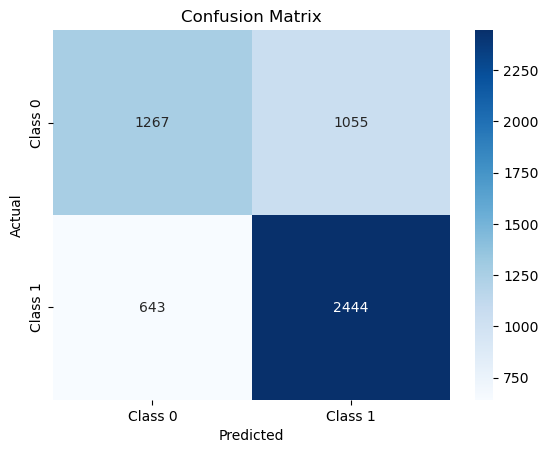

              precision    recall  f1-score   support

       False       0.66      0.55      0.60      2322
        True       0.70      0.79      0.74      3087

    accuracy                           0.69      5409
   macro avg       0.68      0.67      0.67      5409
weighted avg       0.68      0.69      0.68      5409



In [32]:
training_default_removal = ['ID', 'Recidivism_Within_3years', 'Recidivism_Arrest_Year1', 'Recidivism_Arrest_Year2', 'Recidivism_Arrest_Year3']

drop_dummy_groups = []

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

X = df.drop(columns=training_default_removal + dropping)
y = df['Recidivism_Within_3years']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Class distribution before oversampling:")
print(y_train.value_counts())

# Oversampling using SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check class distribution after oversampling
print("\nClass distribution after oversampling:")
print(y_train_resampled.value_counts())

regr = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

regr = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced')
regr.fit(X_train_resampled, y_train_resampled)

y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

drop_dummy_groups = ['Race']

dropping = []
for group in drop_dummy_groups:
    if group in dummy_column_groups:
        dropping.extend(dummy_column_groups[group])

regr = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced')
regr.fit(X_train, y_train)

y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

regr = LogisticRegression(max_iter=1000, C=0.1, class_weight='balanced')
regr.fit(X_train_resampled, y_train_resampled)

y_pred = regr.predict(X_test)

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(classification_report(y_test, y_pred))

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

clf = DecisionTreeClassifier(max_depth=10)
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
print(y_pred.mean())

0.6267332224070993


In [34]:
param_grid = {
    'max_depth': range(2, 14),
    'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 50, 60, 70, 80, 85, 90],
    'max_features': ['sqrt', None]
}

tree_cv = GridSearchCV(estimator=clf, param_grid=param_grid, cv=10)


tree_cv.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(max_depth=10),
             param_grid={'max_depth': range(2, 14),
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [10, 15, 20, 25, 30, 35, 40, 50,
                                              60, 70, 80, 85, 90]})

In [35]:
print(tree_cv.best_params_)

{'max_depth': 10, 'max_features': None, 'min_samples_leaf': 80}


In [36]:
print("Best Cross-validation Accuracy: %.3f" % tree_cv.best_score_)

Best Cross-validation Accuracy: 0.679


In [37]:
def forward_selection_classif(clf, X, y, threshold=None, num_folds=5):
    """ Perform forward feature selection with the given classifier.
    Threshold is the improvement in accuracy for the selection
    process to stop.
    threshold = None causes all features to be selected.
    """

    remaining = list(range(X.shape[1]))
    selected = []
    accuracies = []
    previous_best = 0.0
    while len(remaining) > 0:
        # YOUR CODE HERE
        # Use cross validation accuracy in computing the accuracy.
        # Use cross_val_score() to perform cross validation.
        # Use parameter num_folds to control the number of folds in cross validation.
        # Don't forget that ross_val_score() returns multiple values.
        # To test if the value of threshold is not None, you can write 'threshold is not None'
        best_feature = None
        latest_accuracy = 0.0
        best_accuracy = 0.0


        # Loop through remaining features
        for feature in remaining:

            latest_features = selected + [feature]
            latest_accuracy = np.mean(cross_val_score(clf, X[:, latest_features], y, cv=num_folds))

            if latest_accuracy > best_accuracy:
                best_accuracy = latest_accuracy
                best_feature = feature

        if threshold is not None and best_accuracy - previous_best < threshold:
            break

        selected.append(best_feature)
        remaining.remove(best_feature)
        accuracies.append(best_accuracy)


        previous_best = best_accuracy

    return np.array(selected), accuracies

In [ ]:
def plot_selected(selected, accuracies, predictors):
    pd.Series(accuracies, index=predictors[selected]).plot.barh()
    plt.xlim(0.5, 1.0)
    plt.xlabel('Cross-validation accuracy')
    plt.title('Result of forward feature selection')

In [ ]:
selected, accuracies = forward_selection_classif(tree_cv.best_estimator_, X_train, y_train, num_folds=10)
plot_selected(selected[:10], accuracies[:10], np.array(predictors))

In [ ]:
clf = DecisionTreeClassifier(max_depth=10, max_features=None, min_samples_leaf=80)
clf.fit(X_train, y_train)